In [22]:
# Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from functools import reduce
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# <h1 style="color: #FF8C00;">Collecting data</h1>

## <h3 style="color: #FF6347;">Dataframes</h3>

In [23]:
link="https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators"

In [84]:
df=pd.read_csv("../diabetes_012_health_indicators_BRFSS2015.csv")

In [85]:
print(df.shape)

(253680, 22)


In [86]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [27]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [28]:
df=df.astype(int)

In [29]:
#df=df.to_csv("../csv/diabetes_tableau.csv",index=False)

# <h1 style="color: #FF8C00;">Initial Exploration</h1>

## <h3 style="color: #FF6347;">Dataframes</h3>

Describe columns

Age: 13-level age category (_AGEG5YR see codebook)

1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older

Sex: patient's gender (1: male; 0: female)

HighChol: 0 = no high cholesterol 1 = high cholesterol

CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

BMI: Body Mass Index

Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

MentHlth: days of poor mental health scale 1-30 days

PhysHlth: physical illness or injury days in past 30 days scale 1-30

DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Stroke: you ever had a stroke. 0 = no, 1 = yes

HighBP: 0 = no high, BP 1 = high BP Blood Pressure

Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

Income=
1	Less than $10,000 14800	5.6%
2	$10,000 to less than $15,000 
3	$15,000 to less than $20,000
4	$20,000 to less than $25,000
5	$25,000 to less than $35,000
6	$35,000 to less than $50,000
7	$50,000 to less than $75,000
8	$75,000 or more

Diabetes (target) 0 = no diabetes 1 = prediabetes 2 = diabetes

## <h3 style="color: #FF6347;">Splitting types of data</h3>

In [30]:
num=df.select_dtypes(include="number")
cat=df.select_dtypes(exclude="number")

In [31]:
df.nunique()

diabetes_012             3
highbp                   2
highchol                 2
cholcheck                2
bmi                     84
smoker                   2
stroke                   2
heartdiseaseorattack     2
physactivity             2
fruits                   2
veggies                  2
hvyalcoholconsump        2
anyhealthcare            2
nodocbccost              2
genhlth                  5
menthlth                31
physhlth                31
diffwalk                 2
sex                      2
age                     13
education                6
income                   8
dtype: int64

We'll manipulate the columns with less than 32 unique values as categorical also.

In [32]:
cat_from_num=num.loc[:,num.nunique()<31]

In [33]:
cat=pd.concat([cat,cat_from_num],axis=1)
print(cat.shape[1])

19


In [34]:
cat.head()

,diabetes_012,highbp,highchol,cholcheck,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,diffwalk,sex,age,education,income
0,0,1,1,1,1,0,0,0,0,1,0,1,0,5,1,0,9,4,3
1,0,0,0,0,1,0,0,1,0,0,0,0,1,3,0,0,7,6,1
2,0,1,1,1,0,0,0,0,1,0,0,1,1,5,1,0,9,4,8
3,0,1,0,1,0,0,0,1,1,1,0,1,0,2,0,0,11,3,6
4,0,1,1,1,0,0,0,1,1,1,0,1,0,2,0,0,11,5,4


Now we have to drop the categorical columns from "num"

In [35]:
num=num.drop(columns=cat_from_num.columns)


# <h1 style="color: #FF8C00;">Univariate Analysis</h1>

## <h3 style="color: #FF6347;">Categorical Data</h3>

#### Target: Diabetes

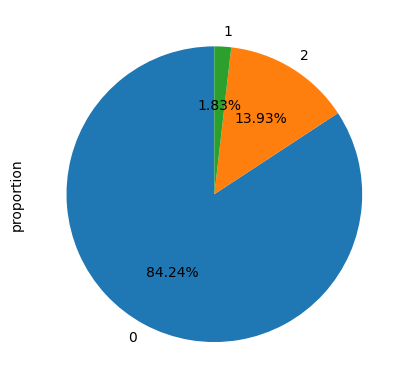

In [36]:
prop_table_diabetes=df.diabetes_012.value_counts(normalize=True)
qual_palette = sns.color_palette("pastel")
prop_table_diabetes.plot.pie(autopct='%1.2f%%' ,startangle=90)

plt.show()

#### Education

In [37]:
freq_table=df.education.value_counts().round(2)
prop_table=df.education.value_counts(normalize=True).round(2)
edu_table=pd.concat([freq_table,prop_table],axis=1)
edu_table.columns=["absolute_frequency","relative_frequency"]
edu_table
total_absolute = freq_table.sum()
total_relative = prop_table.sum()
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row
edu_table=pd.concat([edu_table,total_row])
edu_table



,absolute_frequency,relative_frequency
6,107325,0.42
5,69910,0.28
4,62750,0.25
3,9478,0.04
2,4043,0.02
1,174,0.00
Total,253680,1.01


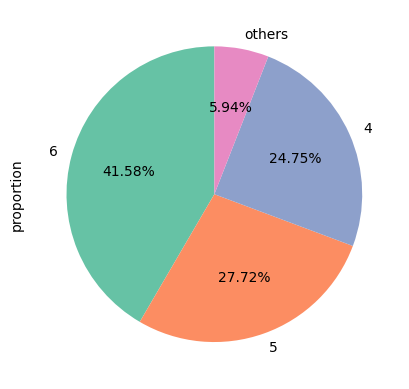

In [38]:
others=prop_table[prop_table< 0.23].sum()
prop_table_grouped=prop_table[prop_table>= 0.05].copy()
prop_table_grouped["others"]=others
prop_table_grouped.plot.pie(autopct='%1.2f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

#### Age

In [39]:
freq_table=df.age.value_counts().round(2)
prop_table=df.age.value_counts(normalize=True).round(2)
age_table=pd.concat([freq_table,prop_table],axis=1)
age_table.columns=["absolute_frequency","relative_frequency"]
age_table
total_absolute = freq_table.sum()
total_relative = prop_table.sum()
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row
age_table=pd.concat([age_table,total_row])
age_table



,absolute_frequency,relative_frequency
9,33244,0.13
10,32194,0.13
8,30832,0.12
7,26314,0.10
11,23533,0.09
6,19819,0.08
13,17363,0.07
5,16157,0.06
12,15980,0.06
4,13823,0.05


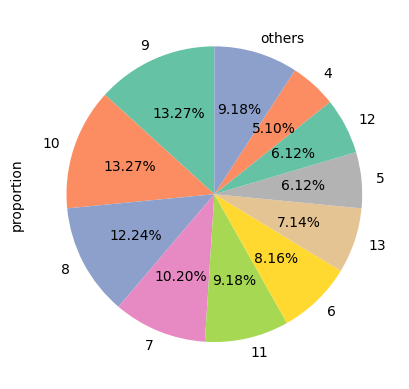

In [40]:
others=prop_table[prop_table< 0.05].sum()
prop_table_grouped=prop_table[prop_table>= 0.05].copy()
prop_table_grouped["others"]=others
prop_table_grouped.plot.pie(autopct='%1.2f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

#### Income

In [41]:
freq_table=df.income.value_counts().round(2)
prop_table=df.income.value_counts(normalize=True).round(2)
income_table=pd.concat([freq_table,prop_table],axis=1)
income_table.columns=["absolute_frequency","relative_frequency"]
total_absolute = freq_table.sum()
total_relative = prop_table.sum()
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row
income_table=pd.concat([age_table,total_row])
income_table



,absolute_frequency,relative_frequency
9,33244,0.13
10,32194,0.13
8,30832,0.12
7,26314,0.10
11,23533,0.09
6,19819,0.08
13,17363,0.07
5,16157,0.06
12,15980,0.06
4,13823,0.05


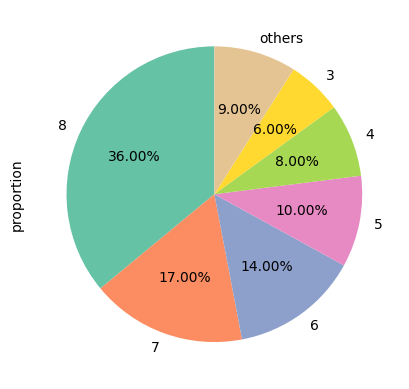

In [42]:
others=prop_table[prop_table< 0.06].sum()
prop_table_grouped=prop_table[prop_table>= 0.06].copy()
prop_table_grouped["others"]=others
prop_table_grouped.plot.pie(autopct='%1.2f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

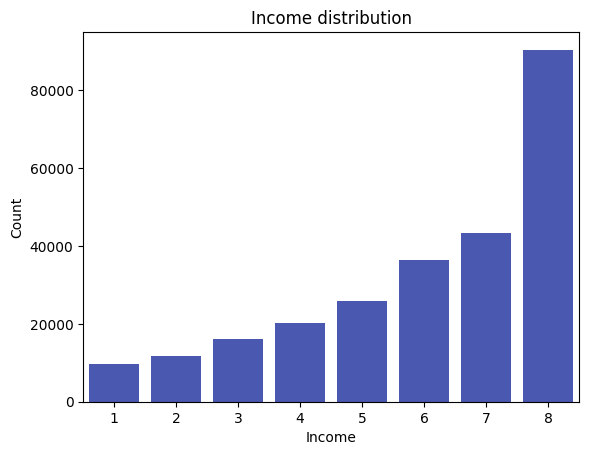

In [43]:
colors = sns.color_palette("coolwarm", len(df)) 
sns.countplot(data=df, x="income",palette=colors)

plt.title("Income distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

In [44]:
df.nunique()

diabetes_012             3
highbp                   2
highchol                 2
cholcheck                2
bmi                     84
smoker                   2
stroke                   2
heartdiseaseorattack     2
physactivity             2
fruits                   2
veggies                  2
hvyalcoholconsump        2
anyhealthcare            2
nodocbccost              2
genhlth                  5
menthlth                31
physhlth                31
diffwalk                 2
sex                      2
age                     13
education                6
income                   8
dtype: int64

#### Gender

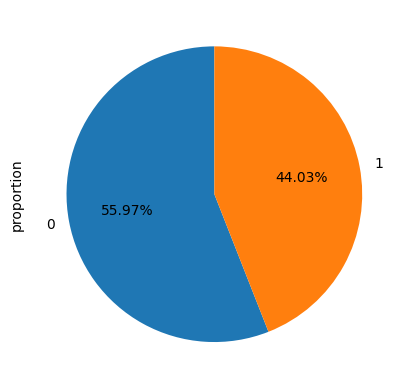

In [45]:
freq_table=df.sex.value_counts(normalize=True)
freq_table.plot.pie(autopct='%1.2f%%' ,startangle=90)
plt.show()

## <h3 style="color: #FF6347;">Numerical Data</h3>

In [46]:
num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
bmi,253680.0,28.38,6.61,12.0,24.0,27.0,31.0,98.0
menthlth,253680.0,3.18,7.41,0.0,0.0,0.0,2.0,30.0
physhlth,253680.0,4.24,8.72,0.0,0.0,0.0,3.0,30.0


Even though mental and physical health are considered numerical variables, we use countplots to visualize them because they have only a few unique values.

#### Mental health

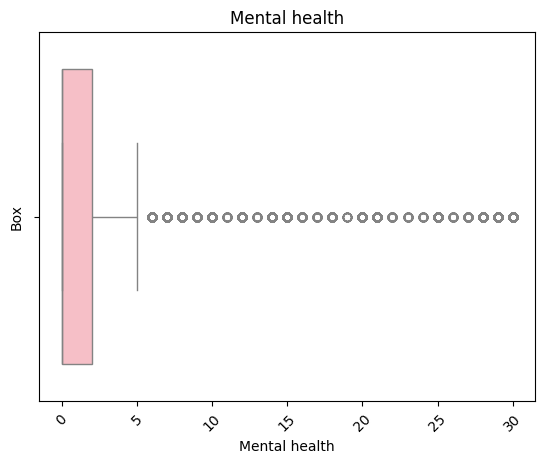

In [47]:
sns.set_palette("pastel")
sns.boxplot(data=df, x="menthlth",color="#FFB6C1") 
plt.title("Mental health")
plt.xlabel("Mental health")
plt.ylabel("Box")
plt.xticks(rotation=45)
plt.show()

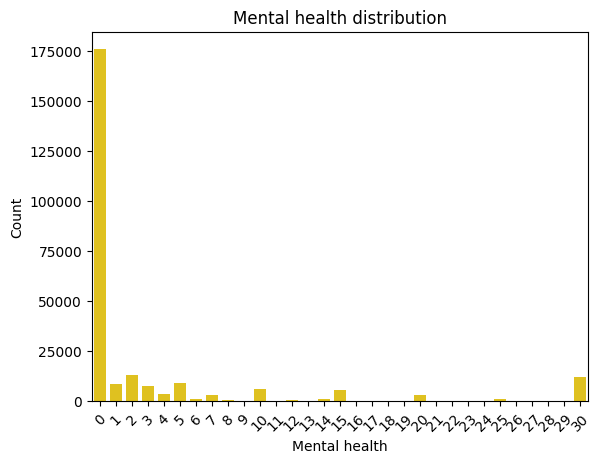

In [48]:
sns.set_palette(sns.color_palette(['#FFD700', '#00FA9A', '#FF4500', '#1E90FF', '#FF69B4', '#32CD32']))
sns.countplot(data=df, x="menthlth")
plt.title("Mental health distribution")
plt.xlabel("Mental health")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Physical health

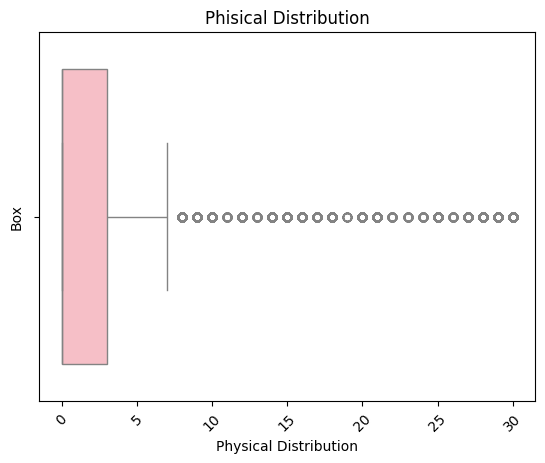

In [49]:
sns.set_palette("pastel")
sns.boxplot(data=df, x="physhlth",color="#FFB6C1") 
plt.title("Phisical Distribution")
plt.xlabel("Physical Distribution")
plt.ylabel("Box")
plt.xticks(rotation=45)
plt.show()

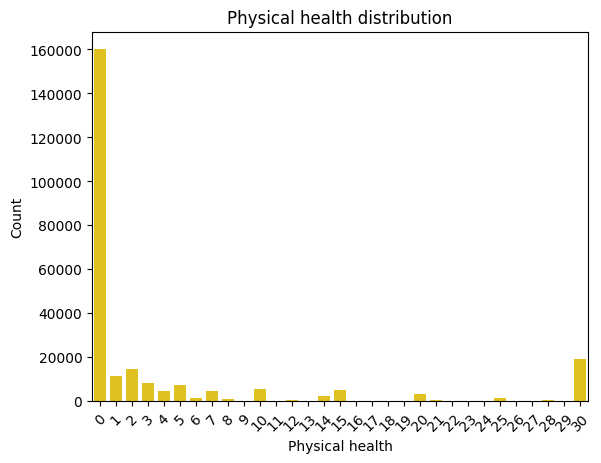

In [50]:
sns.set_palette(sns.color_palette(['#FFD700', '#00FA9A', '#FF4500', '#1E90FF', '#FF69B4', '#32CD32']))
sns.countplot(data=df, x="physhlth")

plt.title("Physical health distribution")
plt.xlabel("Physical health")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Body Mass Index

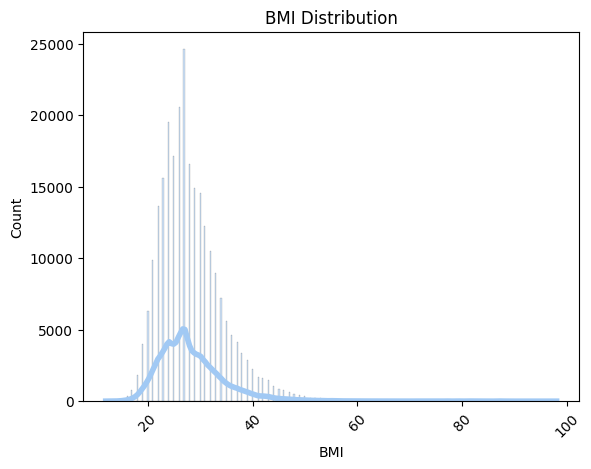

In [51]:
sns.set_palette("pastel")
sns.histplot(data=df, x="bmi",kde=True,line_kws={'linewidth': 4}) 
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

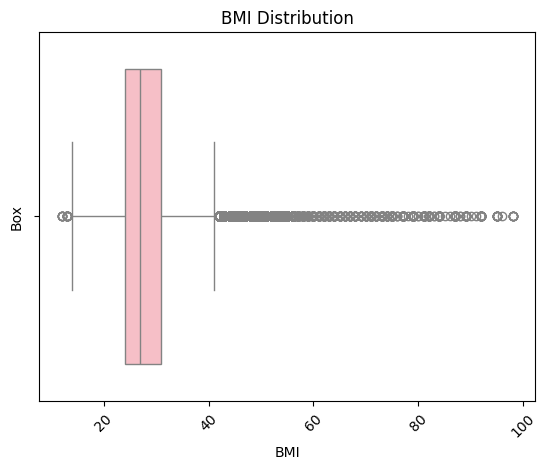

In [52]:
sns.set_palette("pastel")
sns.boxplot(data=df, x="bmi",color="#FFB6C1") 
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Box")
plt.xticks(rotation=45)
plt.show()

In [53]:
# skewness --> skew()
df.bmi.skew().round(2)

np.float64(2.12)

In [54]:
df.bmi.kurtosis().round(2)

np.float64(11.0)

Intentamos quitar los top 8 outliers de la columna BMI. 

In [55]:
top_8_outliers_bmi=df.bmi.sort_values(ascending=False).head(8).index
df=df.drop(top_8_outliers_bmi)

In [56]:
# skewness --> skew()
df.bmi.skew().round(2)

np.float64(2.1)

In [57]:
df.bmi.kurtosis().round(2)

np.float64(10.71)

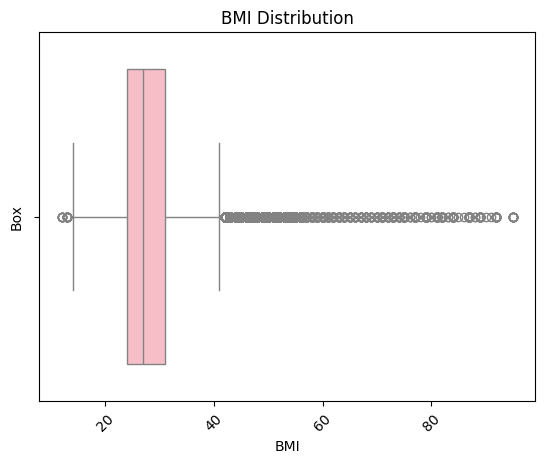

In [58]:
sns.set_palette("pastel")
sns.boxplot(data=df, x="bmi",color="#FFB6C1") 
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Box")
plt.xticks(rotation=45)
plt.show()

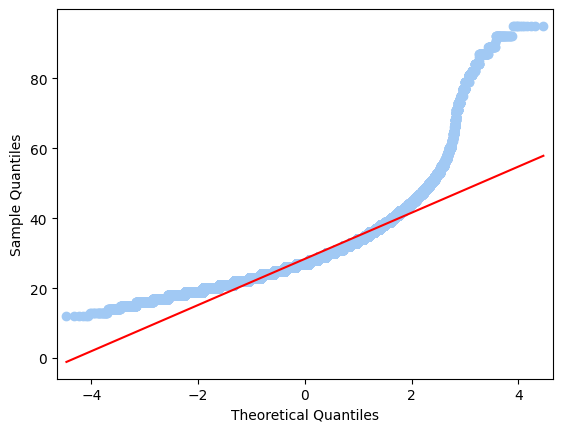

In [59]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'BMI' to check if its distribution follows a normal distribution
sm.qqplot(df['bmi'], line='s');
plt.show()

# <h1 style="color: #FF8C00;">Bivariate Analysis</h1>

## <h3 style="color: #FF6347;">Categorical vs. Categorical</h3>

In [60]:
cat.head()

,diabetes_012,highbp,highchol,cholcheck,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,diffwalk,sex,age,education,income
0,0,1,1,1,1,0,0,0,0,1,0,1,0,5,1,0,9,4,3
1,0,0,0,0,1,0,0,1,0,0,0,0,1,3,0,0,7,6,1
2,0,1,1,1,0,0,0,0,1,0,0,1,1,5,1,0,9,4,8
3,0,1,0,1,0,0,0,1,1,1,0,1,0,2,0,0,11,3,6
4,0,1,1,1,0,0,0,1,1,1,0,1,0,2,0,0,11,5,4


#### Diabetes vs. smoke

In [61]:
cross_dia_smoker=pd.crosstab(index=cat.diabetes_012,columns=cat.smoker)
cross_dia_smoker

smoker,0,1
diabetes_012,,
0,121879,91824
1,2349,2282
2,17029,18317


In [62]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cross_dia_smoker)
chi2_pvalue

np.float64(3.716732429411907e-220)

In [63]:
association(cross_dia_smoker, method='cramer')

0.06311427090367838

We confirm that diabetes and smoking are related based on the chi-square p-value; however, the strength of the relationship is quite weak, as indicated by Cramér's V.

#### Diabetes vs. gender

In [64]:
cross_dia_sex=pd.crosstab(index=cat.diabetes_012,columns=cat.sex)
cross_dia_sex

sex,0,1
diabetes_012,,
0,120959,92744
1,2604,2027
2,18411,16935


In [65]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cross_dia_sex)
chi2_pvalue

np.float64(3.376678611575899e-55)

In [66]:
association(cross_dia_sex, method='cramer')

0.031445929469366536

Again, it seems there is a relation between gender and diabetes, but the relation is so weak. 

#### Diabetes vs. Age

In [67]:
cross_dia_age=pd.crosstab(index=cat.diabetes_012,columns=cat.age)
cross_dia_age

age,1,2,3,4,5,6,7,8,9,10,11,12,13
diabetes_012,,,,,,,,,,,,,
0,5601,7404,10737,13055,14943,17765,22808,26019,26809,24939,17790,12132,13701
1,21,54,72,142,163,312,418,550,702,697,602,445,453
2,78,140,314,626,1051,1742,3088,4263,5733,6558,5141,3403,3209


In [68]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cross_dia_age)
chi2_pvalue

np.float64(0.0)

In [69]:
association(cross_dia_age, method='cramer')

0.13785147254238211

It seems that, like all the other categorical variables analyzed so far, age is significantly related to diabetes but not strongly.

## <h3 style="color: #FF6347;">Numerical vs. Categorical</h3>

#### BMI vs. the Target (Diabetes)

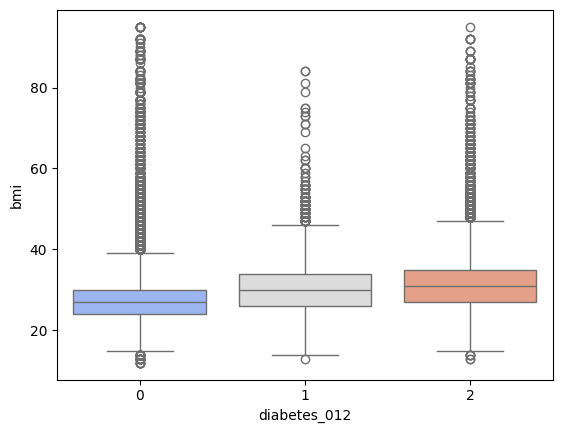

In [70]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data=df, x="diabetes_012", y="bmi", palette="coolwarm")
plt.show()

We will perform an ANOVA (since there are more than two groups: non-diabetic, prediabetic, and diabetic) to determine whether there are significant differences in the mean body mass index among one of the groups compared to the others.

In [71]:
bmi_non_diabetes=df[df["diabetes_012"]== 0]["bmi"]
bmi_pre_diabetes=df[df["diabetes_012"]== 1]["bmi"]
bmi_diabetes=df[df["diabetes_012"]== 2]["bmi"]
print(bmi_non_diabetes.mean())
print(bmi_pre_diabetes.mean())
print(bmi_diabetes.mean())

27.741206088938178
30.71036717062635
31.938403644285998


In [72]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(bmi_non_diabetes,bmi_pre_diabetes, bmi_diabetes) ## python considera anova como un subtipo de fisher, por eso es f_
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: There is no significant impact of diabetes status on BMI levels.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in BMI levels based on diabetes status.")

F-Statistic: 6775.14
P-Value: 0.0000

Reject the Null Hypothesis: There is a significant difference in BMI levels based on diabetes status.


#### BMI vs. physactivity

In [74]:
bmi_physactivity=df[df["physactivity"]== 1]["bmi"]
bmi_non_physactivity=df[df["physactivity"]==0]["bmi"]
print(bmi_physactivity.mean())
print(bmi_non_physactivity.mean())

27.828351092931765
30.09501756885859


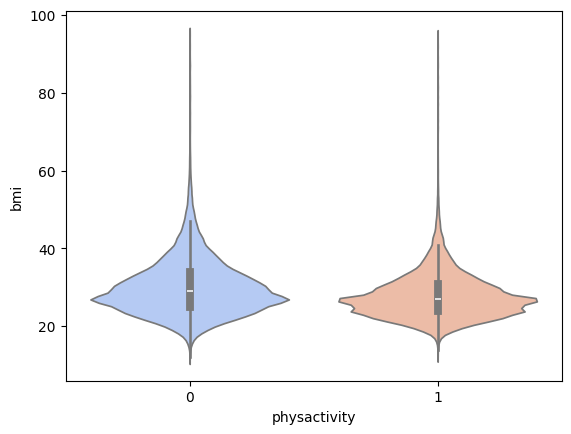

In [75]:
# Plotting a violin plot to visualize the distribution of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.violinplot(data=df, x="physactivity", y="bmi", palette="coolwarm")
plt.show()

We are going to hypothesize that the average BMI values are higher in those who report not engaging in physical activity.

In [76]:
# Perform two-sample t-test for independent samples with alternative hypothesis
t_stat, p_value = st.ttest_ind(
    bmi_physactivity, 
    bmi_non_physactivity, 
    equal_var=False, # Welch's test (more robust, less reliant on variance assumption)
    alternative='less' # Alternative hypothesis: BMI values for physactivity < non_physactivity
)

# Print test results
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: The average BMI values do not differ significantly between those who exercise and those who do not.")
else:
    print("Reject the Null Hypothesis: There is sufficient evidence to conclude that the average BMI values are higher in those who do not exercise.")

Test Statistic (t): -67.77
P-Value: 0.0000

Reject the Null Hypothesis: There is sufficient evidence to conclude that the average BMI values are higher in those who do not exercise.


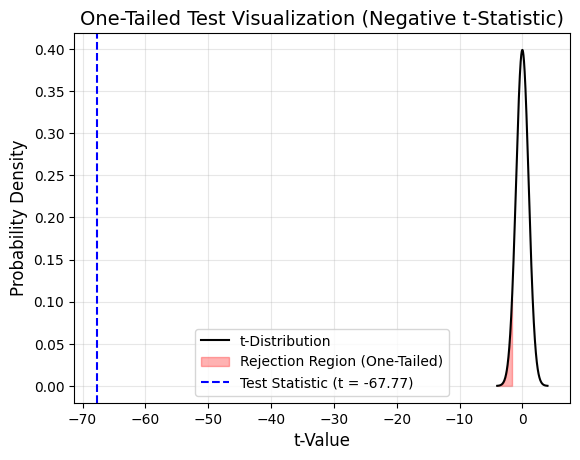

In [77]:

# Generate t-distribution
x = np.linspace(-4, 4, 1000)  # x-axis values for the t-distribution
y = st.t.pdf(x, df=len(df)-1)  # t-distribution density function

# Plot t-distribution
plt.plot(x, y, label="t-Distribution", color="black")

# Highlight rejection region (left-tailed test)
plt.fill_between(
    x, 0, y, where=(x < st.t.ppf(alpha, df=len(df)-1)), color='red', alpha=0.3, label='Rejection Region (One-Tailed)'
)

# Mark the test statistic
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Test Statistic (t = {t_stat:.2f})')

# Title and legend
plt.title("One-Tailed Test Visualization (Negative t-Statistic)", fontsize=14)
plt.xlabel("t-Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show plot
plt.show()

#### BMI vs. Gender

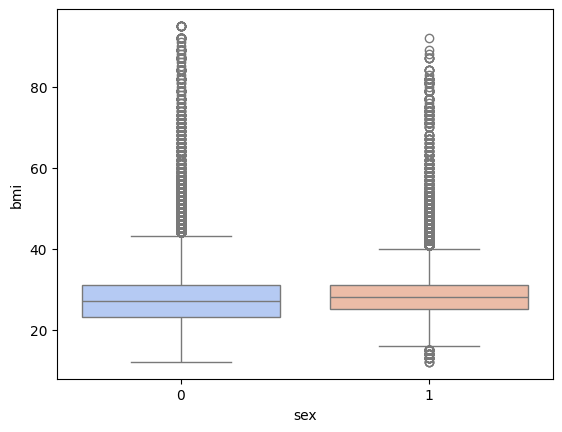

In [78]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data=df, x="sex", y="bmi", palette="coolwarm")
plt.show()

## <h3 style="color: #FF6347;">Numerical vs. Numerical</h3>

#### BMI vs. Mental Health

In [79]:
df.menthlth.corr(df.bmi) ## Pearson method

np.float64(0.08526178032234673)

In [80]:
df.menthlth.corr(df.bmi,method="spearman") ## Spearman method

np.float64(0.05389937834294984)

These variables are not correlated according to any of the methods used.

# <h1 style="color: #FF8C00;">Multivariate Analysis</h1>

Since none of the columns consist of strings, we can assume that all of them are numerical for the upcoming machine learning model. Therefore, although the heatmap correlation matrix is intended for continuous values, we are applying it to the entire dataset.

In [81]:
correlation_matrix=df.corr()

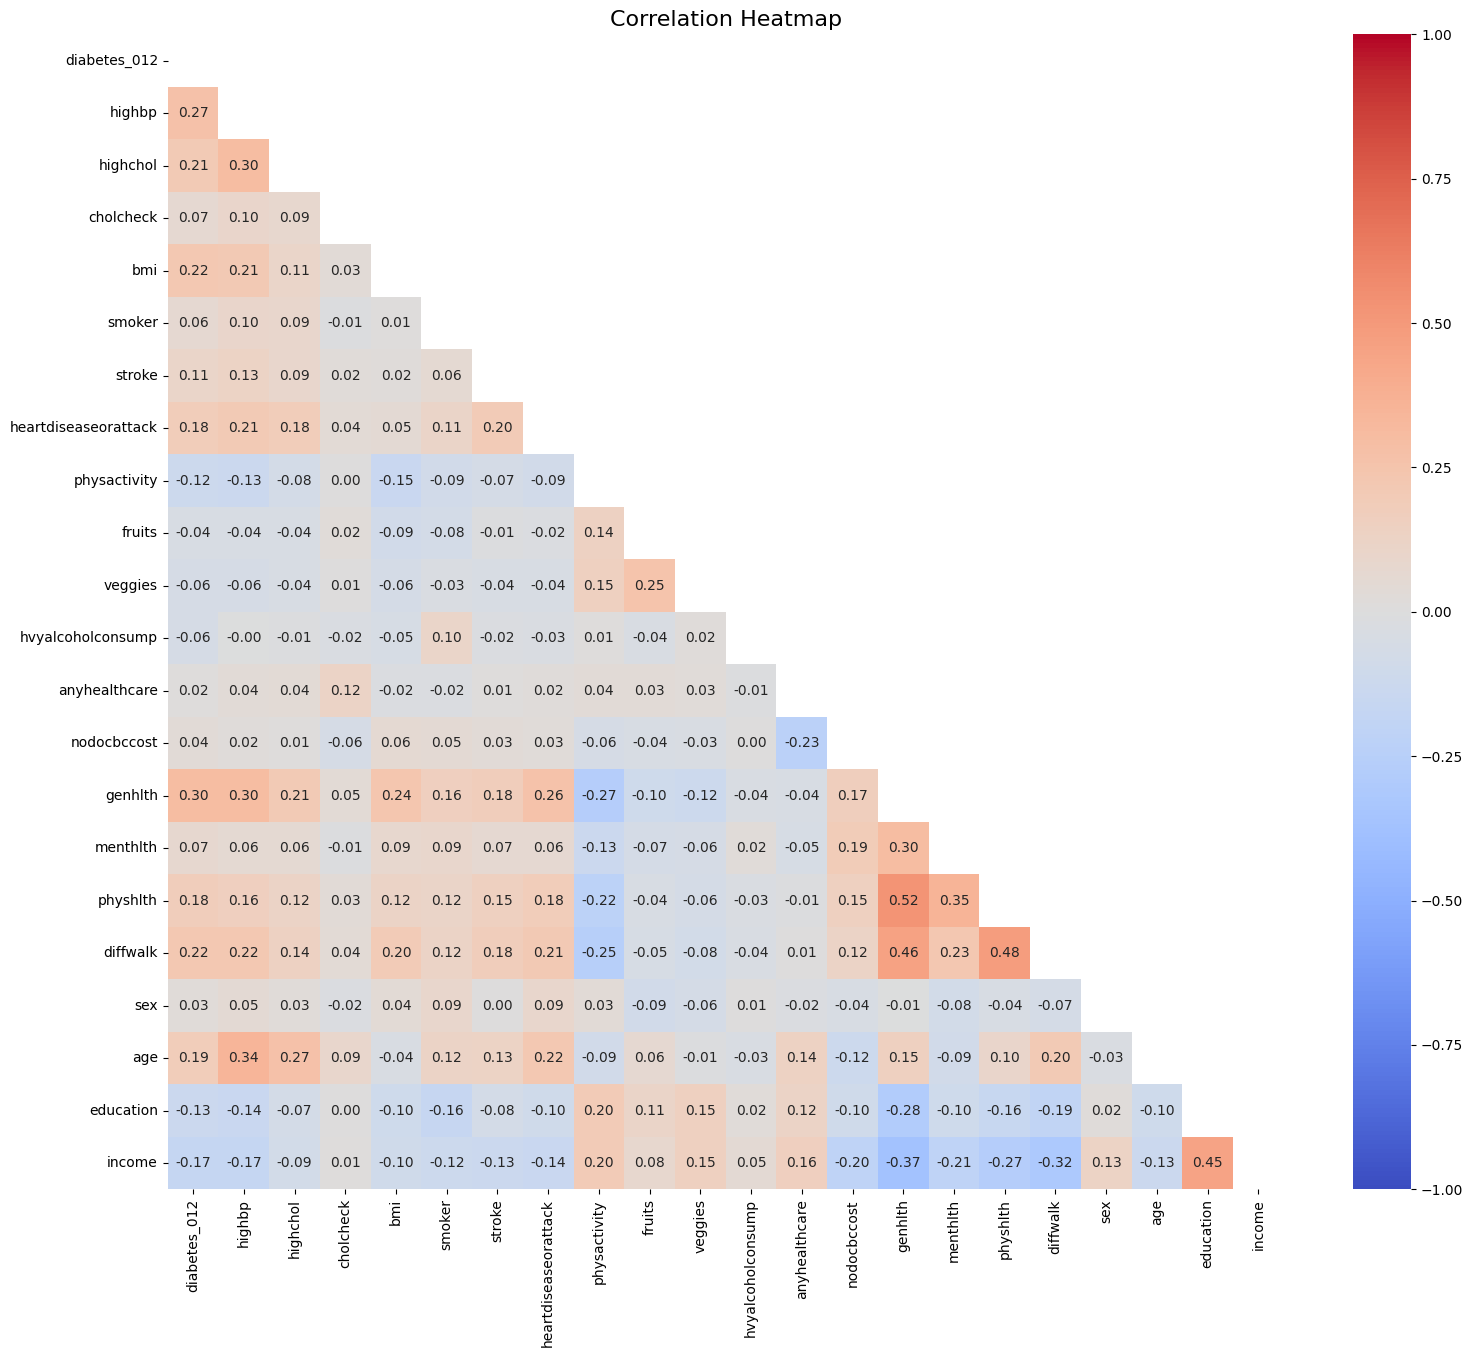

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the mask to hide the upper or lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Upper triangle
# mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))  # Lower triangle

# Set the figure size
plt.figure(figsize=(18, 15))

# Draw the heatmap with the mask applied
sns.heatmap(
    correlation_matrix, 
    mask=mask,  # Apply the mask
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, vmax=1,
    annot_kws={"size": 10}
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

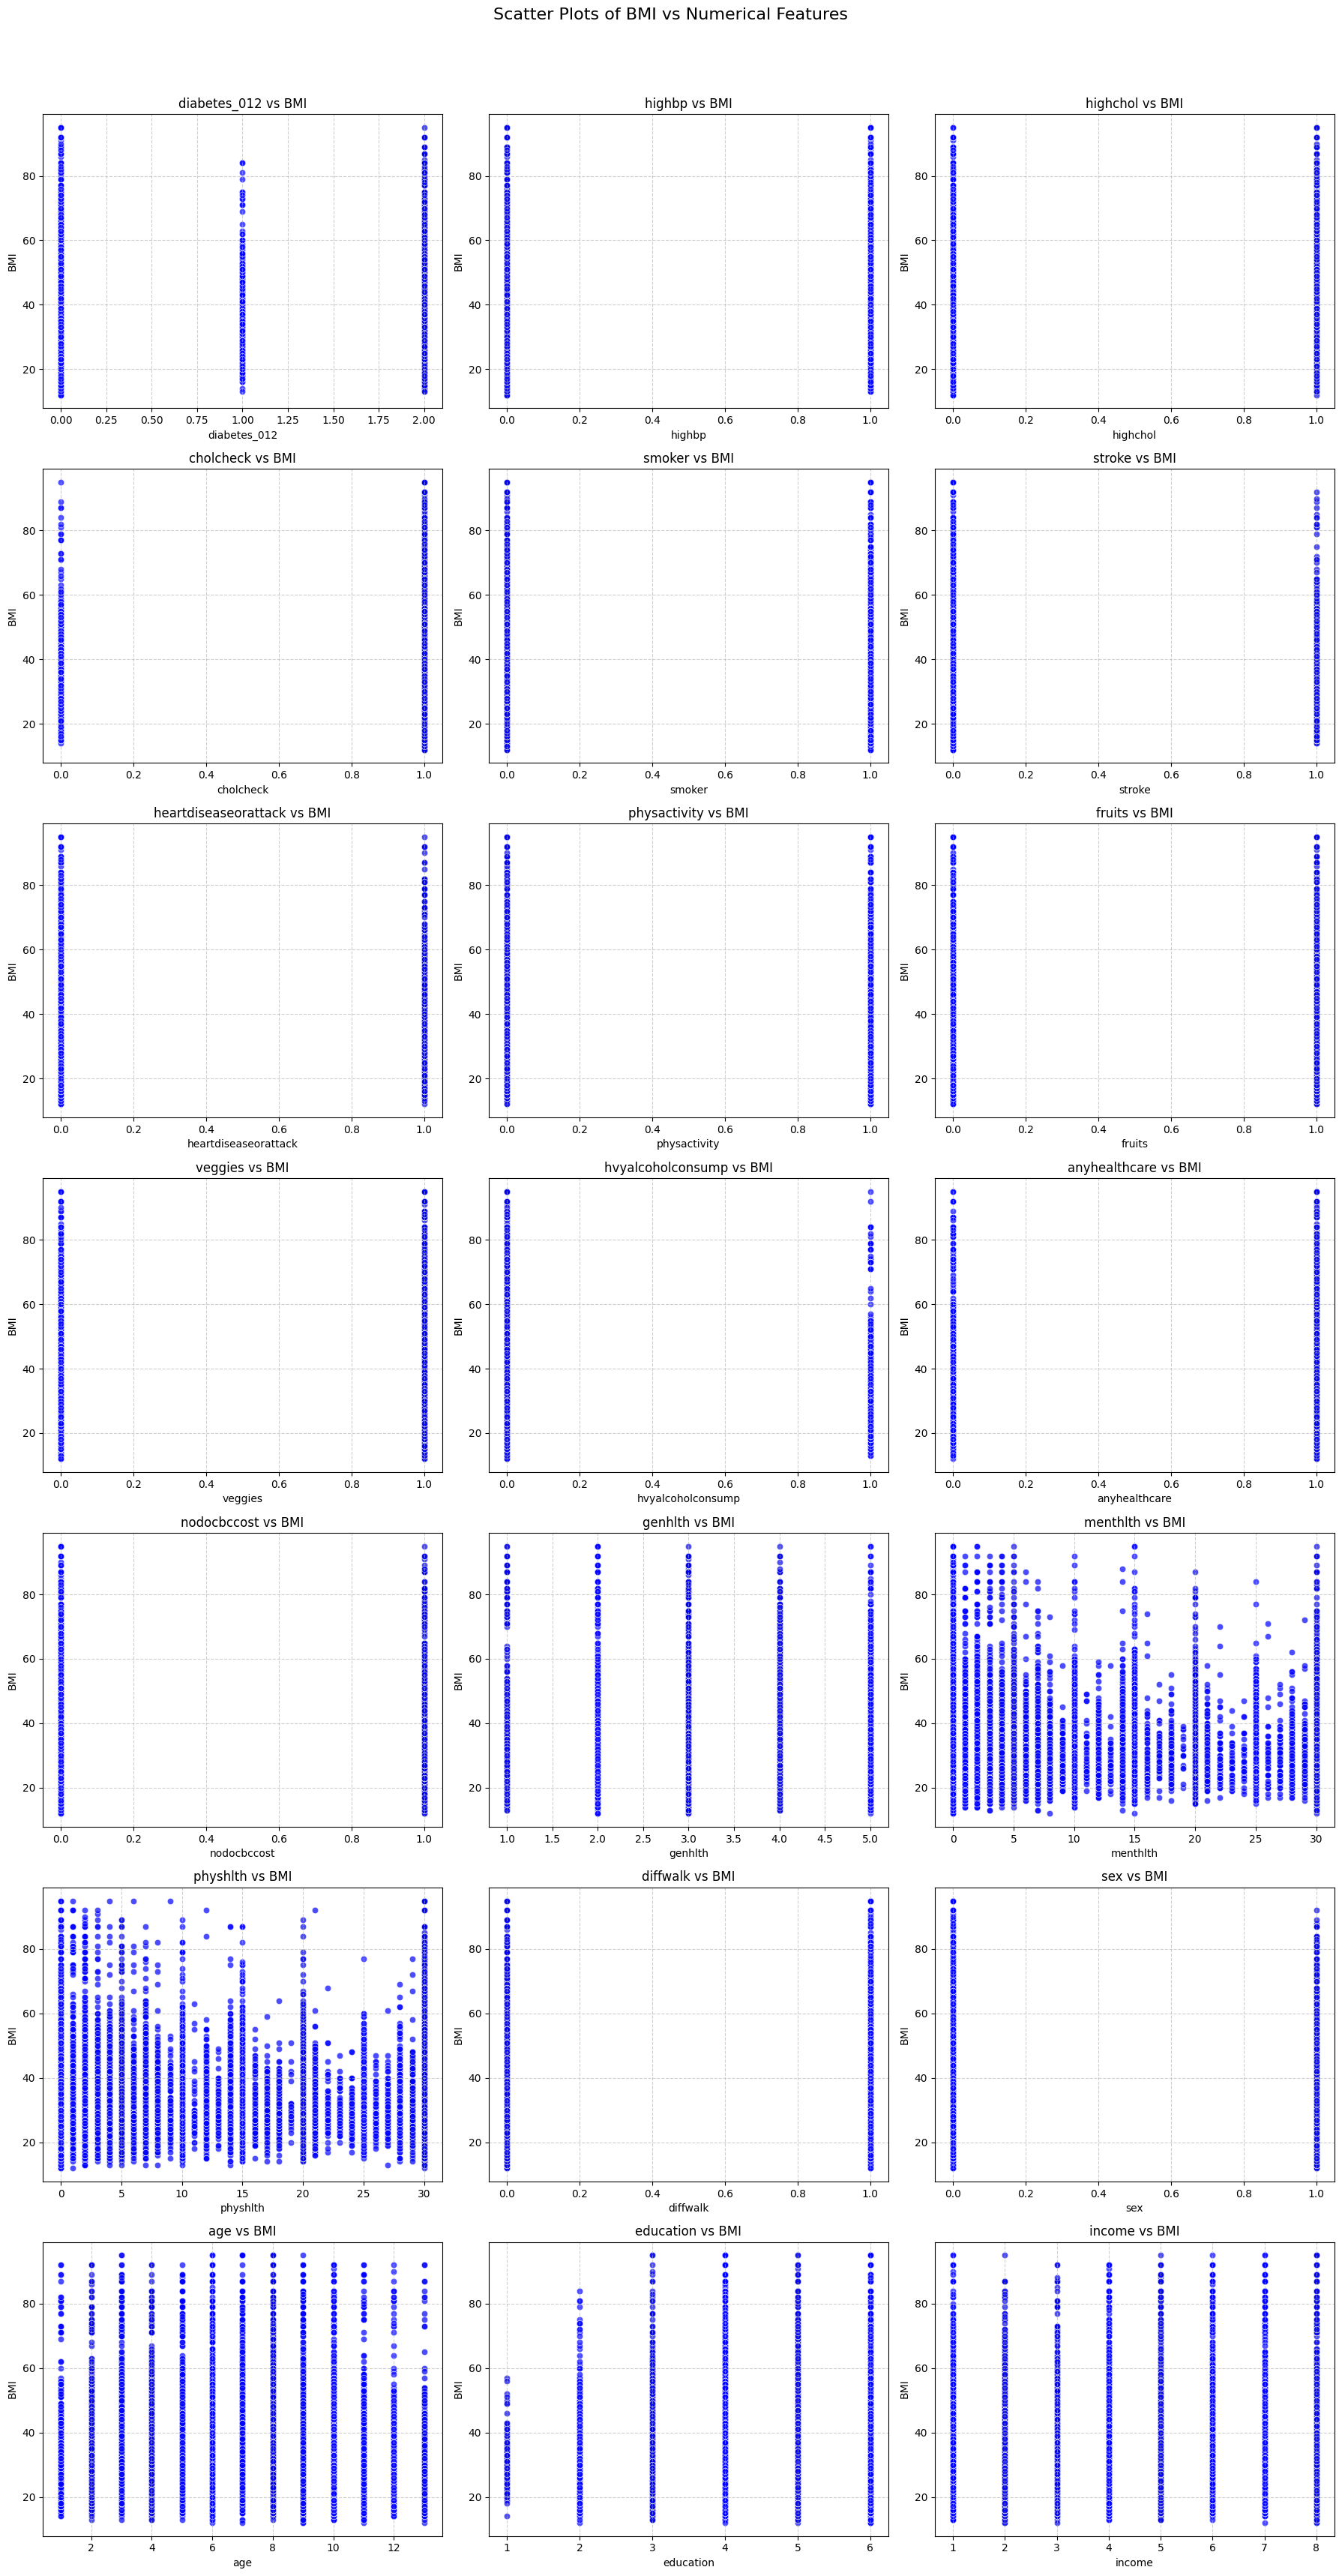

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define numerical columns
num = df.select_dtypes(include=['float64', 'int64']).drop(columns=["bmi"])  # Exclude 'bmi' itself if it's in the numerical columns

# Number of columns in the grid
num_cols = 3

# Calculate the rows required for the grid, ensuring the last row has only one plot
num_rows = math.ceil(len(num.columns) / num_cols)

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
fig.suptitle("Scatter Plots of BMI vs Numerical Features", fontsize=16)

# Ensure `axes` is iterable even if it's 1D
axes = axes.ravel()

# Create scatter plots
for i, col in enumerate(num.columns):
    sns.scatterplot(data=df, x=col, y="bmi", ax=axes[i], color="blue", alpha=0.7)
    axes[i].set_title(f"{col} vs BMI")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('BMI')
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Remove empty axes if there are fewer plots than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


We can observe that none of the other columns are truly continuous variables, as we see a pattern of discrete values being spread across them.